In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [67]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [68]:
df.shape

(96453, 11)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [70]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [71]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


# Converting date to datetime 

In [72]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [73]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [74]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [75]:
df['Precip Type']

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96453, dtype: object

In [76]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [77]:
df.dropna(axis='index' ,inplace=True)

In [78]:
df.shape

(95936, 11)

In [79]:
df['Apparent Temperature (C)'].unique()

array([ 7.38888889,  7.22777778,  9.37777778, ..., 12.14444444,
        9.73888889,  9.23333333])

In [80]:
# setting date as index
df.set_index('Formatted Date',inplace = True)

In [81]:
df.index

DatetimeIndex(['2006-03-31 22:00:00+00:00', '2006-03-31 23:00:00+00:00',
               '2006-04-01 00:00:00+00:00', '2006-04-01 01:00:00+00:00',
               '2006-04-01 02:00:00+00:00', '2006-04-01 03:00:00+00:00',
               '2006-04-01 04:00:00+00:00', '2006-04-01 05:00:00+00:00',
               '2006-04-01 06:00:00+00:00', '2006-04-01 07:00:00+00:00',
               ...
               '2016-09-09 12:00:00+00:00', '2016-09-09 13:00:00+00:00',
               '2016-09-09 14:00:00+00:00', '2016-09-09 15:00:00+00:00',
               '2016-09-09 16:00:00+00:00', '2016-09-09 17:00:00+00:00',
               '2016-09-09 18:00:00+00:00', '2016-09-09 19:00:00+00:00',
               '2016-09-09 20:00:00+00:00', '2016-09-09 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=95936, freq=None)

In [82]:
df['2006-03-31 22:00:00+00:00']

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.


In [86]:
#I have daily data i want monthly so we will use resampling for both humidity and apparent temp
resample_col = ['Apparent Temperature (C)','Humidity']
df_monthly_sample = df[resample_col].resample('M').mean()  #M monthly
df_monthly_sample

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,9.825775,0.827951


Text(0.5, 1.0, 'Variation in temperature and humidity with time')

<Figure size 1152x576 with 0 Axes>

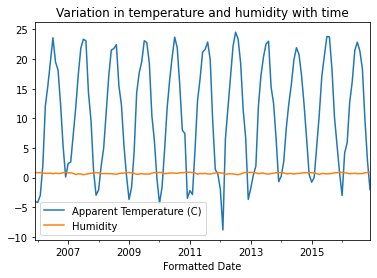

In [96]:
plt.figure(figsize=(16,8))
df_monthly_sample.plot()
plt.title('Variation in temperature and humidity with time')

Interpretation: From the above plot, we can say that humidity remained almost constant in these 10 years. Even the average apparent temperature is almost same (as peaks lie on the same line)

In [90]:
# checking for april
df_april = df_monthly_sample[df_monthly_sample.index.month ==4]

In [91]:
df_april

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-30 00:00:00+00:00,12.098827,0.728625
2007-04-30 00:00:00+00:00,11.894421,0.536361
2008-04-30 00:00:00+00:00,11.183688,0.693194
2009-04-30 00:00:00+00:00,14.267076,0.567847
2010-04-30 00:00:00+00:00,11.639406,0.706875
2011-04-30 00:00:00+00:00,12.978997,0.591625
2012-04-30 00:00:00+00:00,11.780703,0.643583
2013-04-30 00:00:00+00:00,12.045563,0.677667
2014-04-30 00:00:00+00:00,12.486181,0.691403


Text(0.5, 1.0, 'Variation of apparent temperature and humidity in April')

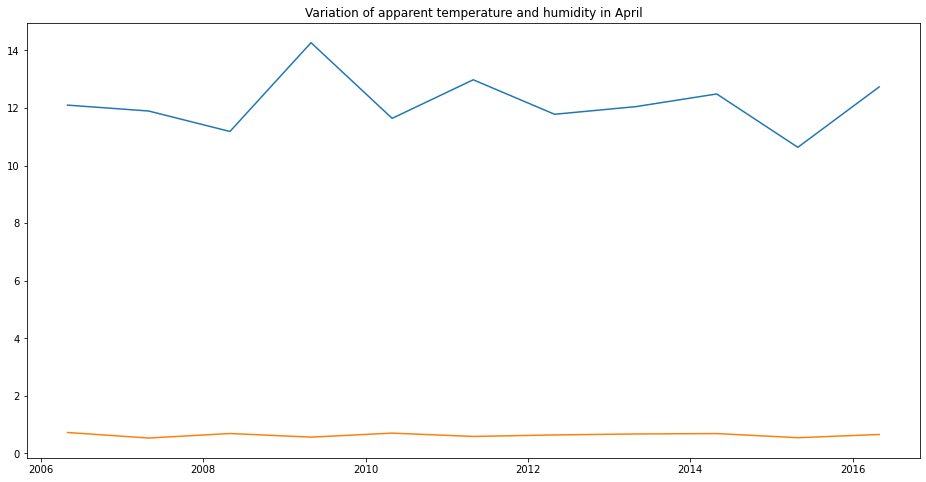

In [94]:
plt.plot(df_april)
plt.title('Variation of apparent temperature and humidity in April')
plt.figure(figsize=(16,8))



In [95]:
# doing this for all months
df_jan = df_monthly_sample[df_monthly_sample.index.month ==1]
df_feb = df_monthly_sample[df_monthly_sample.index.month ==2]
df_march = df_monthly_sample[df_monthly_sample.index.month ==3]
df_april = df_monthly_sample[df_monthly_sample.index.month ==4]
df_may = df_monthly_sample[df_monthly_sample.index.month ==5]
df_june = df_monthly_sample[df_monthly_sample.index.month ==6]
df_july = df_monthly_sample[df_monthly_sample.index.month ==7]
df_aug = df_monthly_sample[df_monthly_sample.index.month ==8]
df_sept = df_monthly_sample[df_monthly_sample.index.month ==9]
df_oct = df_monthly_sample[df_monthly_sample.index.month ==10]
df_nov = df_monthly_sample[df_monthly_sample.index.month ==11]
df_dec= df_monthly_sample[df_monthly_sample.index.month ==12]








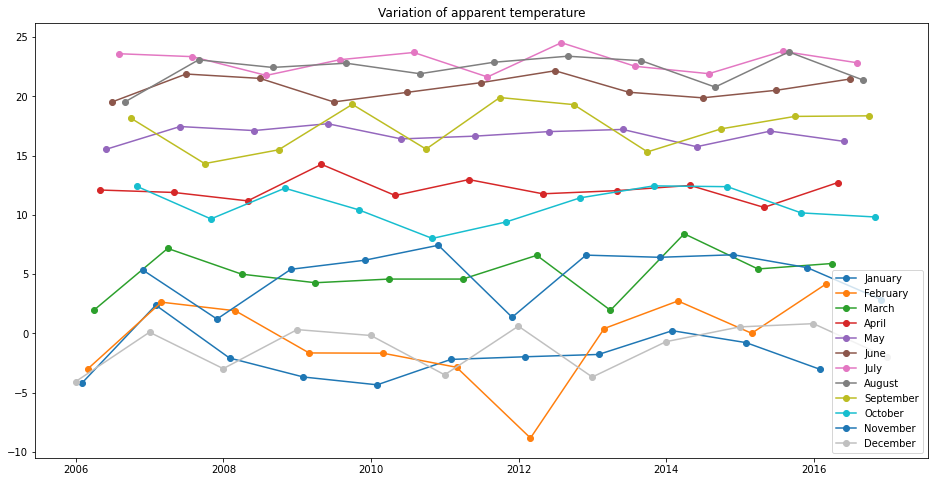

In [109]:
#plotting
plt.figure(figsize=(16,8))
plt.plot(df_jan['Apparent Temperature (C)'], label='January',marker='o')
plt.plot(df_feb['Apparent Temperature (C)'], label='February',marker='o')
plt.plot(df_march['Apparent Temperature (C)'], label='March',marker='o')
plt.plot(df_april['Apparent Temperature (C)'], label='April',marker='o')
plt.plot(df_may['Apparent Temperature (C)'], label='May',marker='o')
plt.plot(df_june['Apparent Temperature (C)'], label='June',marker='o')
plt.plot(df_july['Apparent Temperature (C)'], label='July',marker='o')
plt.plot(df_aug['Apparent Temperature (C)'], label='August',marker='o')
plt.plot(df_sept['Apparent Temperature (C)'], label='September',marker='o')
plt.plot(df_oct['Apparent Temperature (C)'], label='October',marker='o')
plt.plot(df_nov['Apparent Temperature (C)'], label='November',marker='o')
plt.plot(df_dec['Apparent Temperature (C)'], label='December',color='silver',marker='o')
plt.title("Variation of apparent temperature")
plt.legend()

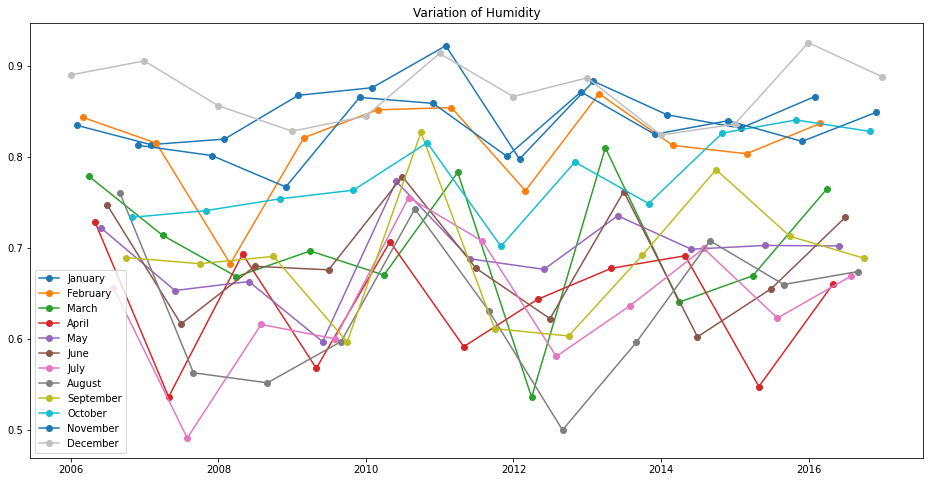

In [110]:
plt.figure(figsize=(16,8))
plt.plot(df_jan['Humidity'], label='January',marker='o')
plt.plot(df_feb['Humidity'], label='February',marker='o')
plt.plot(df_march['Humidity'], label='March',marker='o')
plt.plot(df_april['Humidity'], label='April',marker='o')
plt.plot(df_may['Humidity'], label='May',marker='o')
plt.plot(df_june['Humidity'], label='June',marker='o')
plt.plot(df_july['Humidity'], label='July',marker='o')
plt.plot(df_aug['Humidity'], label='August',marker='o')
plt.plot(df_sept['Humidity'], label='September',marker='o')
plt.plot(df_oct['Humidity'], label='October',marker='o')
plt.plot(df_nov['Humidity'], label='November',marker='o')
plt.plot(df_dec['Humidity'], label='December',color='silver',marker='o')
plt.title("Variation of Humidity")
plt.legend()

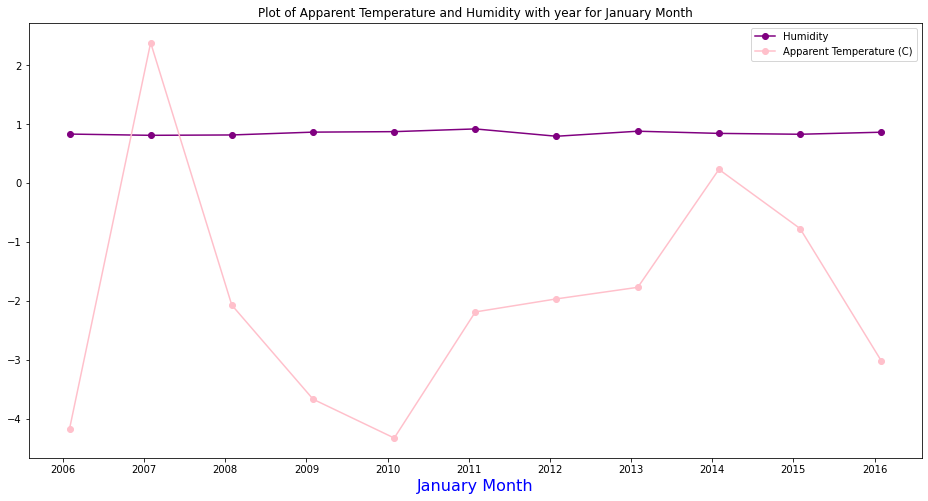

In [120]:
#Plotting for each individual month
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for January Month")
plt.plot(df_jan['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('January Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)


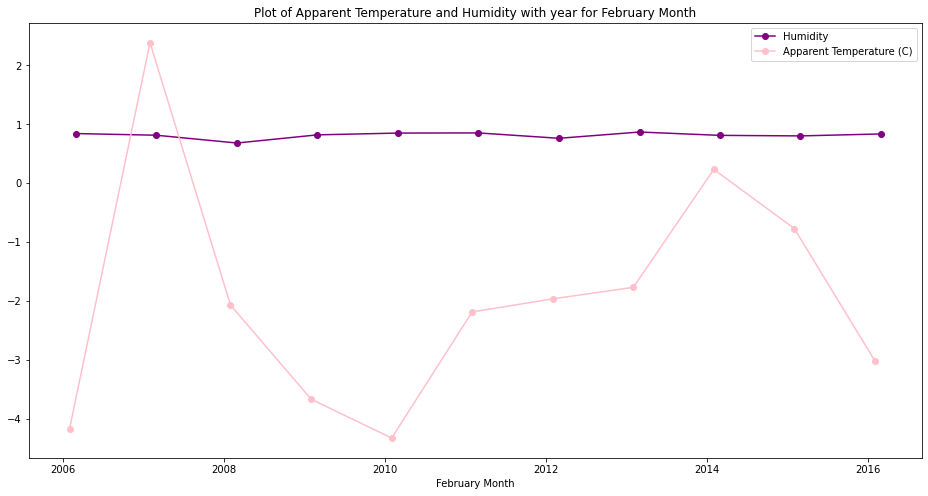

In [121]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for February Month")
plt.plot(df_feb['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('February Month')
plt.legend(loc=1,fontsize=10)

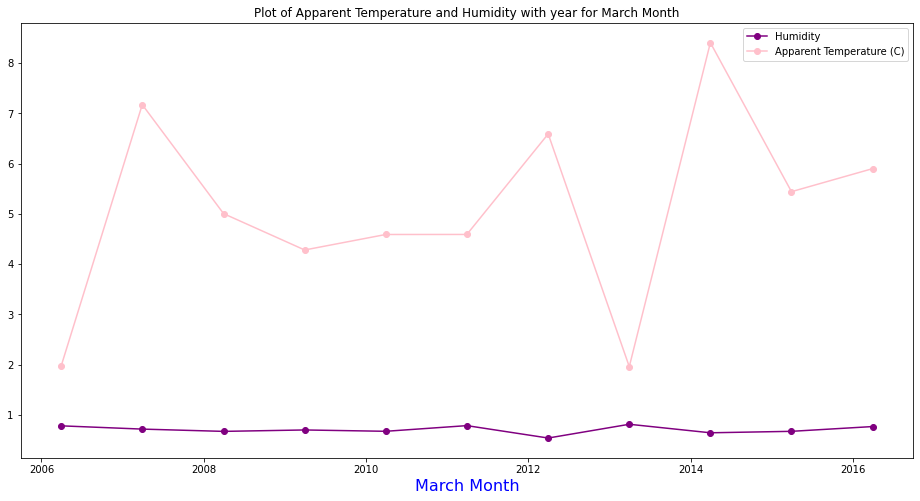

In [123]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for March Month")
plt.plot(df_march['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_march['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('March Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)



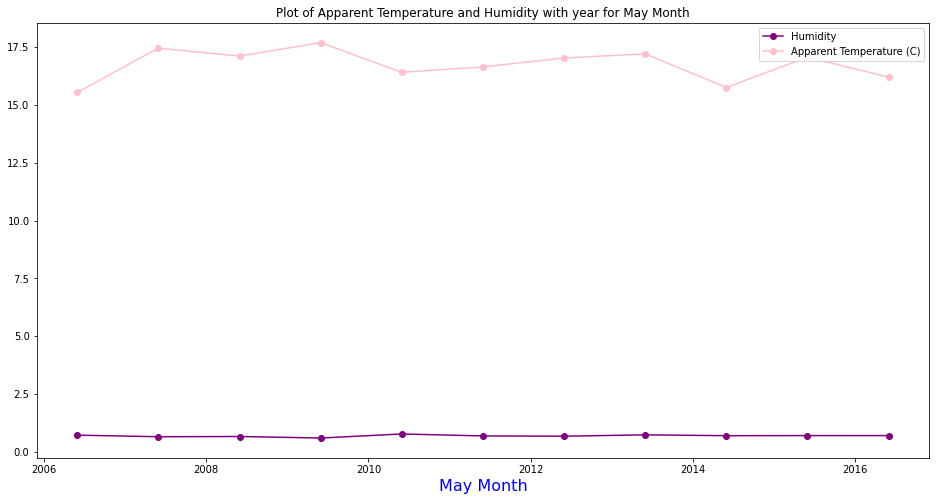

In [133]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for May Month")
plt.plot(df_may['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_may['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('May Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)

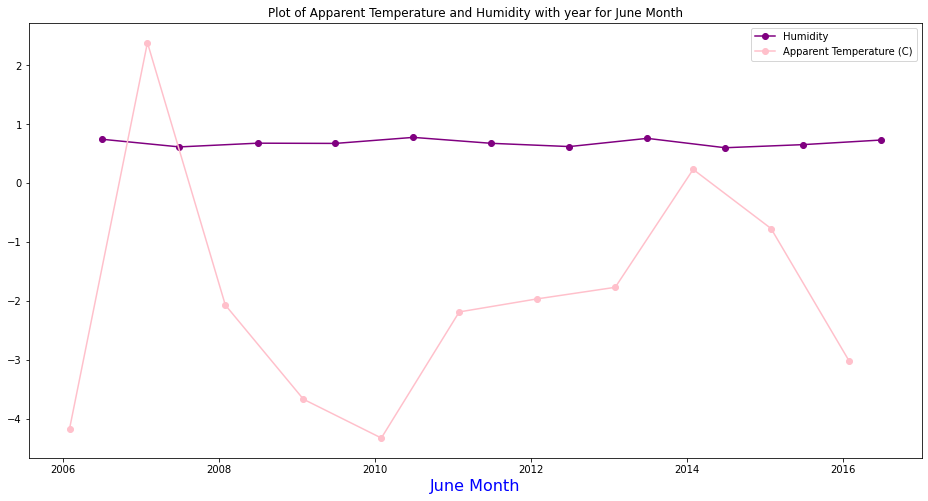

In [134]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for June Month")
plt.plot(df_june['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('June Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)

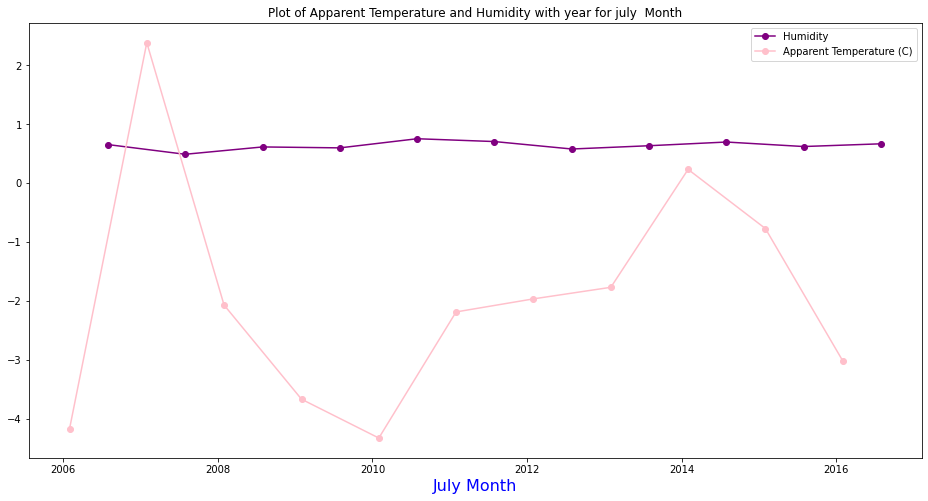

In [140]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for july  Month")
plt.plot(df_july['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('July Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)

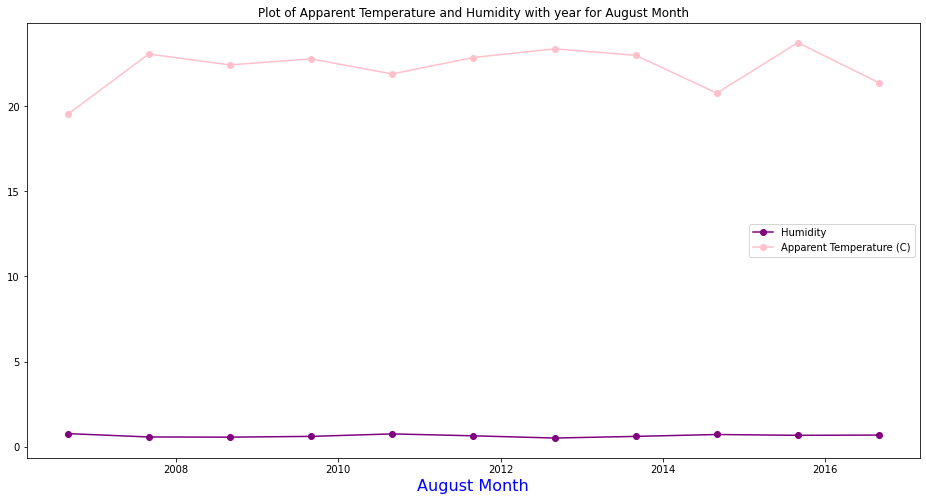

In [141]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for August Month")
plt.plot(df_aug['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_aug['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('August Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

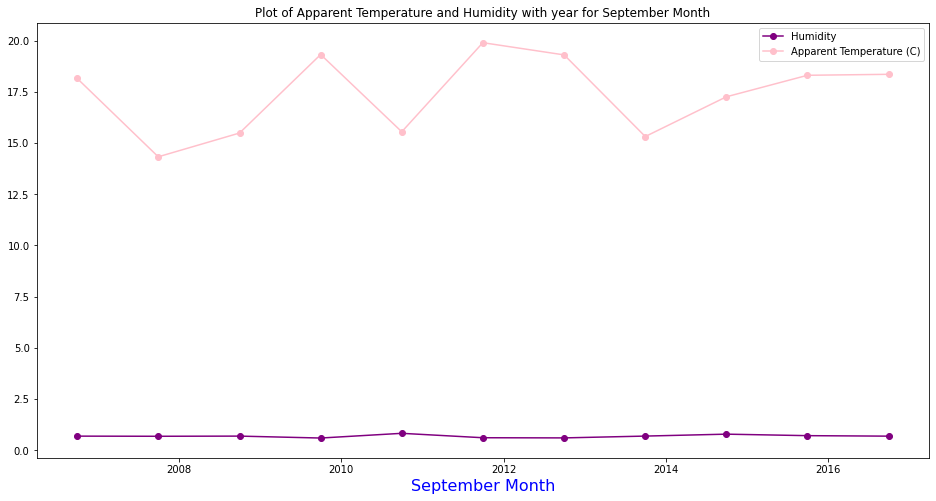

In [144]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for September Month")
plt.plot(df_sept['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_sept['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('September Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)

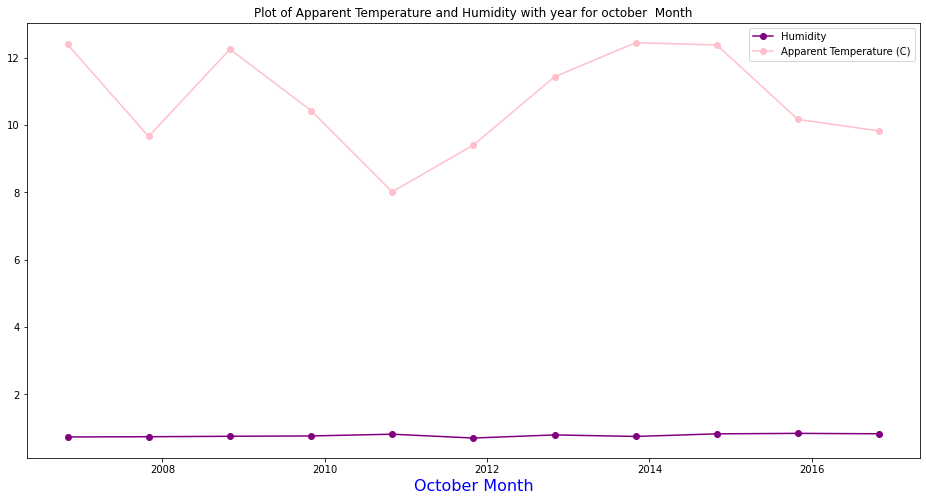

In [145]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for october  Month")
plt.plot(df_oct['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_oct['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('October Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)

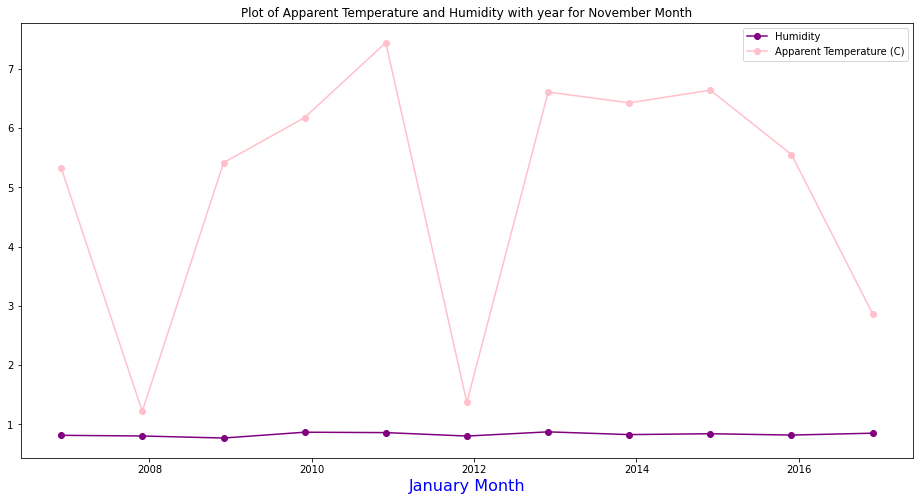

In [147]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for November Month")
plt.plot(df_nov['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_nov['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('January Month',fontsize=16,color='Blue')
plt.legend(loc=1,fontsize=10)

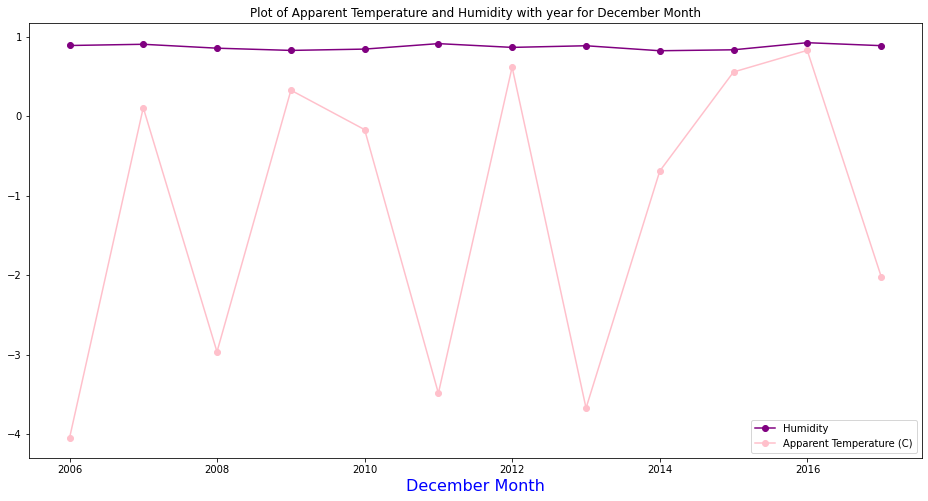

In [149]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for December Month")
plt.plot(df_dec['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(df_dec['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('December Month',fontsize=16,color='Blue')
plt.legend(loc=4,fontsize=10)

# Conclusion

For april month there is no change in average humidity. The year 2009 can see an increase in average apparent temperature, then a fall in 2010, then a slight increase in 2011, then a significant drop in 2015, and then an increase in 2016.